In [1]:
import shutil
import hashlib
import unittest
from pathlib import Path
from datetime import datetime
import joblib
from portfawn.portfolio import BackTest, BackTestAnalysis
from tests.utils import get_normal_param


## Setting the Parameters
The first step to optimize portfolios is to set the configurations such as the list of tickers, backtesting periods, and sampling and optimization paramters.

In [2]:
# tickers
tickers = {"DOW": "^DJI", 
              "NASDAQ Composite": "^IXIC", 
              "RUSSELL 2000": "^RUT", 
              "S&P 500": "^GSPC", 
              "DAX PERFORMANCE-INDEX": "^GDAXI", 
              "NIKKEI 225": "^N225", 
              "HANG SENG INDEX": "^HSI", 
              "13 Week Treasury Bill": "^IRX", 
              "Treasury Yield 30 Years": "^TYX"}
asset_list = list(tickers.values())

# date
start_date = datetime.strptime("2021-01-01", "%Y-%m-%d").date()
end_date = datetime.strptime("2021-06-30", "%Y-%m-%d").date()
training_days = 60
testing_days = 30

# market
risk_free_rate = 0.0

# portfolio
portfolio_fitness_list = ["SA", "MV", "MR", "MSR", "Equal"]

optimization_params = {
    "scipy_params": {
        "maxiter": 1000,
        "disp": False,
        "ftol": 1e-10,
    },
    "target_return": 0.1,
    "target_risk": 0.1,
    "weight_bound": (0.0, 1.0),
}
sampling_params = {"type": "standard"}

# system
n_jobs = joblib.cpu_count() - 1

# backtest
backtesting_name = 'test'

# config
backtesting_config = {
    "backtesting_name": backtesting_name,
    "portfolio_fitness_list": portfolio_fitness_list,
    "tickers": tickers,
    "start_date": start_date,
    "end_date": end_date,
    "optimization_params": optimization_params,
    "sampling_params": sampling_params,
    "training_days": training_days,
    "testing_days": testing_days,
    "risk_free_rate": risk_free_rate,
    "n_jobs": n_jobs,
}

In [3]:
portfolio_backtest = BackTest(**backtesting_config)
portfolio_backtest.backtesting_config

[*********************100%***********************]  9 of 9 completed


/media/patrin/PROJECTS/projects/PortFawn/venv/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


{'backtesting_name': 'test',
 'portfolio_fitness_list': ['SA', 'MV', 'MR', 'MSR', 'Equal'],
 'tickers': {'DOW': '^DJI',
  'NASDAQ Composite': '^IXIC',
  'RUSSELL 2000': '^RUT',
  'S&P 500': '^GSPC',
  'DAX PERFORMANCE-INDEX': '^GDAXI',
  'NIKKEI 225': '^N225',
  'HANG SENG INDEX': '^HSI',
  '13 Week Treasury Bill': '^IRX',
  'Treasury Yield 30 Years': '^TYX'},
 'start_date': datetime.date(2021, 1, 1),
 'end_date': datetime.date(2021, 6, 30),
 'optimization_params': {'scipy_params': {'maxiter': 1000,
   'disp': False,
   'ftol': 1e-10},
  'target_return': 0.1,
  'target_risk': 0.1,
  'weight_bound': (0.0, 1.0)},
 'sampling_params': {'type': 'standard'},
 'training_days': 60,
 'testing_days': 30,
 'risk_free_rate': 0.0,
 'n_jobs': 11}

In [4]:
# portfolio_backtest.market_data.data_returns

In [5]:
portfolio_backtest.run()

In [6]:
hash = hashlib.md5(
    "".join([str(i) for i in backtesting_config.values()]).encode("utf-8")
).hexdigest()[0:6]
dirname = f"results_{hash}"
analysis = BackTestAnalysis(portfolio_backtest, result_path=Path(dirname))


/tmp/ipykernel_12813/3915544900.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  a.show()


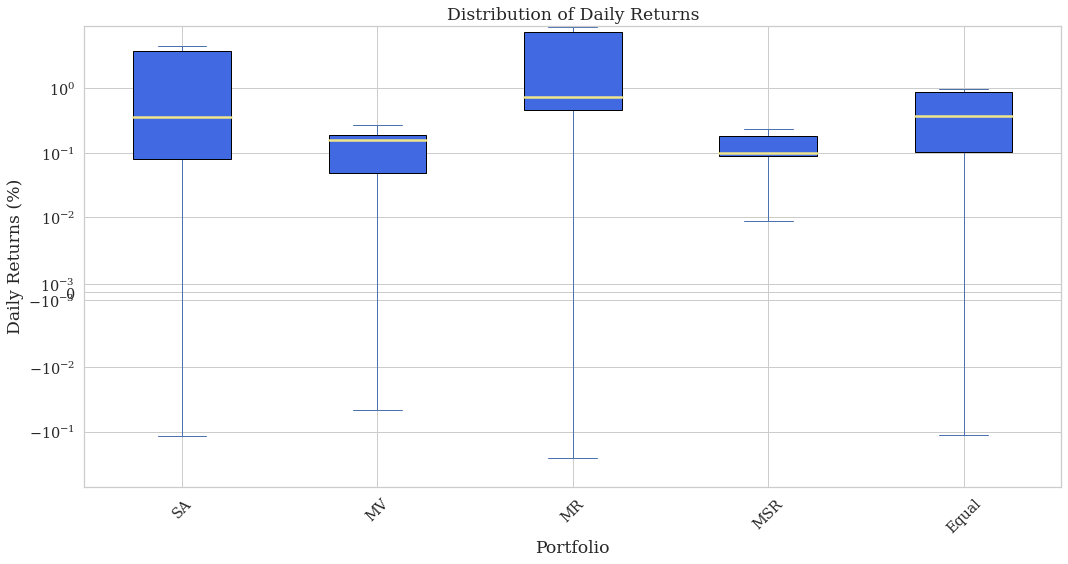

In [7]:
a = analysis.plot_returns_dist()
a.show()

/tmp/ipykernel_12813/4151066766.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  a.show()


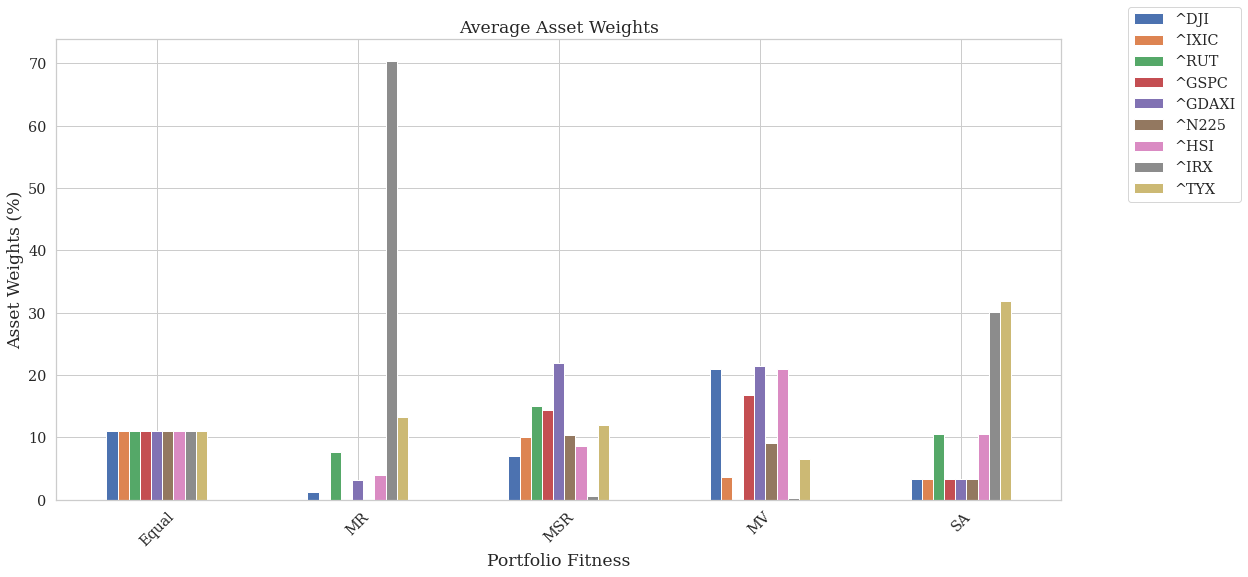

In [8]:
a = analysis.plot_asset_weights()
a.show()

/tmp/ipykernel_12813/1655415205.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  a.show()


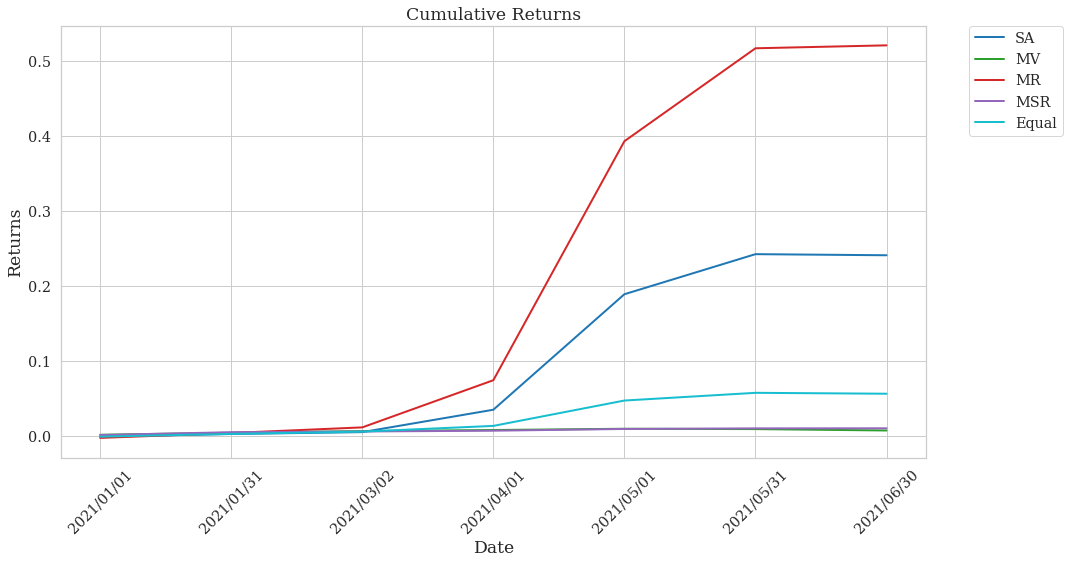

In [9]:
a = analysis.plot_trends()
a.show()

/tmp/ipykernel_12813/1836937316.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  a.show()


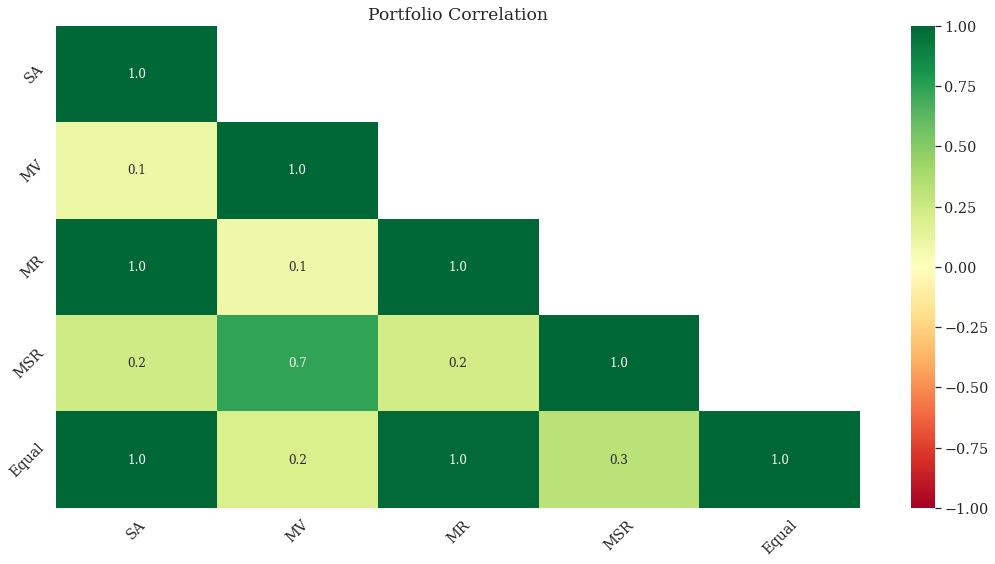

In [10]:
a = analysis.plot_corr()
a.show()

/tmp/ipykernel_12813/4176102703.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  a.show()


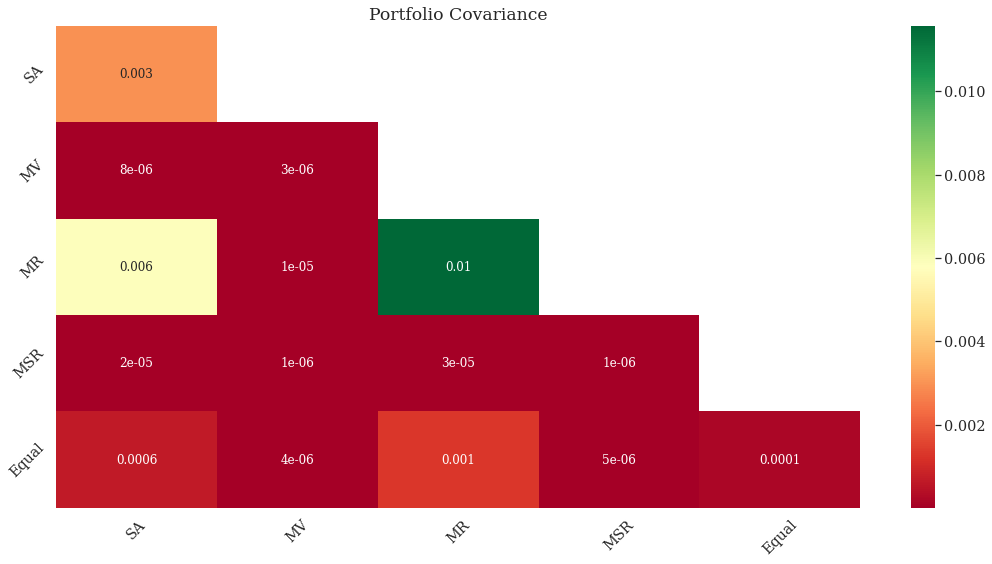

In [11]:
a = analysis.plot_cov()
a.show()

In [12]:
# import pandas as pd
# import matplotlib.pyplot as plt
# profile_backtesting_test = [
#             i["profile_testing"] for i in portfolio_backtest.profile_backtesting
#         ]

In [13]:
# asset_weight_list = []
# for i in profile_backtesting_test:

#     d = i["asset_weights"]
#     d.update({"date": i["date"], "portfolio_fitness": i["portfolio_fitness"]})
#     asset_weight_list.append(d)


# asset_weight_df = (
#     pd.DataFrame(asset_weight_list).groupby("portfolio_fitness").agg("mean")
# )
# asset_weight_df
# asset_weight_df.plot.bar()
# plt.yscale('log')

In [14]:








# class TestPortfolioType(unittest.TestCase):
#     def test_portfolio(self):
#         kwargs = get_normal_param()

#         # backtesting
        
#         portfolio_backtesting.run()

#         # analysis
#         hash = hashlib.md5(
#             "".join([str(i) for i in kwargs.values()]).encode("utf-8")
#         ).hexdigest()[0:6]
#         dirname = f"results_{hash}"
#         analysis = BackTestAnalysis(portfolio_backtesting, result_path=Path(dirname))
#         analysis.plot()

#         # shutil.rmtree(dirname, ignore_errors=True)
